In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd

In [3]:
files = [
    "data/exp_2_data/tablevivoX30.txt", # stimulate, no buttom ad
    "data/exp_2_data/table罗技.txt", # stimulate, no buttom ad
    "data/exp_2_data/table王者荣耀.txt", # stimulate, no buttom ad
    "data/exp_2_data/table苹果官方售后.txt", # stimulate, no buttom ad
    
    "data/exp_2_data/table华为智能冰箱.txt", # regular, with buttom ad
    "data/exp_2_data/table汇源果汁.txt", # regular, with buttom ad
    "data/exp_2_data/table美甲流行色.txt", # regular, with buttom ad
    "data/exp_2_data/table雅虎财经.txt", # regular, with buttom ad
    
    "data/exp_2_data/table海尔冰箱.txt", # study, with buttom ad
    "data/exp_2_data/table爱尔兰双飞六日游.txt", # study, with buttom ad
    "data/exp_2_data/table医疗保险.txt", # study, with buttom ad
    "data/exp_2_data/table飞利浦咖啡机.txt", # study, with buttom ad
]
anno = [
        ["stimulate", "vivoX30"],
        ["stimulate", "Logitech"],
        ["stimulate", "King_of_glory"],
        ["stimulate", "apple_sales"],
    
        ["regular", "Huawei_iot_fridge"],
        ["regular", "Huiyuan_juice"],
        ["regular", "trend_nail_color"],
        ["regular", "Yahoo_financial"],
    
        ["study", "Haier"],
        ["study", "Ireland_travel"],
        ["study", "Medical_insurance"],
        ["study", "Philips_coffee_machine"],
       ]

In [4]:
def get_long_data(f, group=None, task_name=None):
    df = pd.read_csv(f, sep="\t").iloc[0:-1]
    data = df.iloc[:, 2::]
    rename_cols = []
    for c in data.columns:
        cs = c.split("_")
        rename_cols.append([cs[0], cs[2], cs[3]])
    data.columns = pd.MultiIndex.from_tuples(rename_cols)
    data.index = pd.MultiIndex.from_frame(df.iloc[:, 0:2])
    data = data.melt(ignore_index=False).reset_index()
    data.columns = ['Rec', 'Gender', 'Metric', 'Pos', 'Data_type', 'Value']
    data['group'] = group
    data['task_name'] = task_name
    return data

In [5]:
full_data = None
for f, an in zip(files, anno):
    data = get_long_data(f, *an)
    if full_data is None:
        full_data = data
    else:
        full_data = pd.concat([full_data, data])
full_data.reset_index(drop=True, inplace=True)

In [6]:
full_data

,Rec,Gender,Metric,Pos,Data_type,Value,group,task_name
0,Rec A02,male,Fixation Duration,ad1,N,18,stimulate,vivoX30
1,Rec A03,female,Fixation Duration,ad1,N,8,stimulate,vivoX30
2,Rec A04,male,Fixation Duration,ad1,N,-,stimulate,vivoX30
3,Rec A05,female,Fixation Duration,ad1,N,5,stimulate,vivoX30
4,Rec A06,male,Fixation Duration,ad1,N,8,stimulate,vivoX30
...,...,...,...,...,...,...,...,...
25570,Rec 28,male,Time to First Fixation,an6,Sum,-,study,Philips_coffee_machine
25571,Rec 29,male,Time to First Fixation,an6,Sum,-,study,Philips_coffee_machine
25572,Rec 30,female,Time to First Fixation,an6,Sum,7.346,study,Philips_coffee_machine
25573,Rec 31,female,Time to First Fixation,an6,Sum,-,study,Philips_coffee_machine


In [7]:
used_data = full_data[(full_data['Metric'].str.startswith("Total")) & (full_data['Data_type'] == 'Sum')].copy()

In [8]:
relative_fixation_duration = []
for n, g in used_data.groupby(['Rec', 'task_name'], sort=False):
    value_sum = g['Value'].sum()
    if value_sum != 0:
        relative_fixation_duration += list(g['Value'] / value_sum)
    else:
        relative_fixation_duration += list(g['Value'])

In [9]:
used_data['relative_fixation_duration'] = relative_fixation_duration

In [10]:
used_data

,Rec,Gender,Metric,Pos,Data_type,Value,group,task_name,relative_fixation_duration
1085,Rec A02,male,Total Fixation Duration (Include Zeros),ad1,Sum,3.692,stimulate,vivoX30,0.143045
1086,Rec A03,female,Total Fixation Duration (Include Zeros),ad1,Sum,1.675,stimulate,vivoX30,0.268927
1087,Rec A04,male,Total Fixation Duration (Include Zeros),ad1,Sum,0.0,stimulate,vivoX30,0.127509
1088,Rec A05,female,Total Fixation Duration (Include Zeros),ad1,Sum,0.9,stimulate,vivoX30,0.017745
1089,Rec A06,male,Total Fixation Duration (Include Zeros),ad1,Sum,1.616,stimulate,vivoX30,0.005812
...,...,...,...,...,...,...,...,...,...
19432,Rec 28,male,Total Fixation Duration (Include Zeros),an6,Sum,0.0,regular,trend_nail_color,0.086520
19433,Rec 29,male,Total Fixation Duration (Include Zeros),an6,Sum,0.0,regular,trend_nail_color,0.404681
19434,Rec 30,female,Total Fixation Duration (Include Zeros),an6,Sum,0.067,regular,trend_nail_color,0.007802
19435,Rec 31,female,Total Fixation Duration (Include Zeros),an6,Sum,0.0,regular,trend_nail_color,0.000000


In [15]:
from scipy.stats import kruskal
from statannot import add_stat_annotation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("tab10")
# font_name = "Heiti TC" # For mac
font_name = "STXIHEI" # For win
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.labelsize'] = 13

In [12]:
stimulate_ad4 = used_data[(used_data['group'] == 'stimulate') & (used_data['Pos'] == 'ad4')]['relative_fixation_duration']
regular_ad4 = used_data[(used_data['group'] == 'regular') & (used_data['Pos'] == 'ad4')]['relative_fixation_duration']

kruskal(stimulate_ad4, regular_ad4)

KruskalResult(statistic=1.9580716046150919, pvalue=0.1617197071081315)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

stimulate v.s. regular: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.304e-18 U_stat=2.632e+05


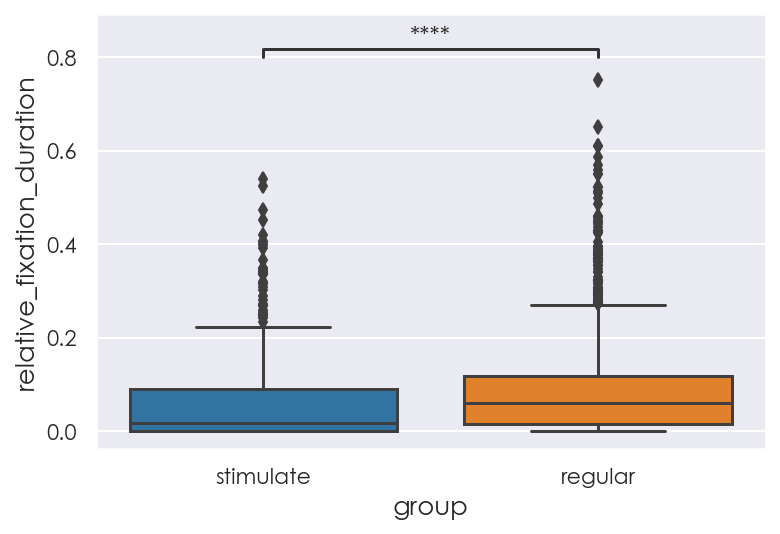

In [16]:
ax = sns.boxplot(data=used_data, x="group", y='relative_fixation_duration')
test_results = add_stat_annotation(ax, 
                                   data=used_data, x="group", y='relative_fixation_duration',
                                   test='Mann-Whitney', text_format='star',
                                   box_pairs=[("stimulate", "regular")],
                                  )